In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import matplotlib.pyplot as plt

In [21]:
# Print out the first 5 rows
dc_hrc_crime = pd.read_excel("../DANL340/Origin/dc_hrc_crime.xlsx")
dc_hrc_crime.head()

,year,census_tract,crime_count,city,state,geography,geographicareaname,population,hrc_count
0,2022,101,19,Washington,DC,1400000US11001000101,"Census Tract 1.01, District of Columbia, Distr...",1281,0
1,2022,102,228,Washington,DC,1400000US11001000102,"Census Tract 1.02, District of Columbia, Distr...",3227,0
2,2022,201,13,Washington,DC,1400000US11001000201,"Census Tract 2.01, District of Columbia, Distr...",3938,0
3,2022,202,202,Washington,DC,1400000US11001000202,"Census Tract 2.02, District of Columbia, Distr...",4425,0
4,2022,300,73,Washington,DC,1400000US11001000300,"Census Tract 3, District of Columbia, District...",5966,0


In [22]:
# Dividing dataset into categories and numerical columns
dc_hrc_crime_cat=dc_hrc_crime.select_dtypes(object)
dc_hrc_crime_num=dc_hrc_crime.select_dtypes(np.number)

In [23]:
# Convert categories into numerical values
dc_hrc_crime_cat = dc_hrc_crime_cat.apply(le.fit_transform)
# Combining the categories and numerical into one dataset
dc_hrc_crime_final=pd.concat([dc_hrc_crime_cat,dc_hrc_crime_num], axis=1)

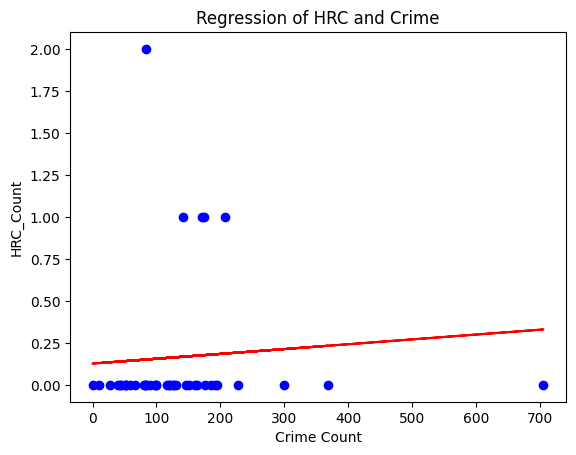

In [27]:
# Target/independent variable
x = dc_hrc_crime_final[['crime_count']].values
# Target variable/dependent variable
y = dc_hrc_crime_final['hrc_count'].values

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

regression_model = LinearRegression()

# Train the regression model on training data
regression_model.fit(x_train, y_train)

# Plot the data points and linear regression line
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, regression_model.predict(x_test), color='red')
plt.title('Regression of HRC and Crime')
plt.xlabel('Crime Count')
plt.ylabel('HRC_Count')
plt.show()